In [1]:
install.packages("MASS")
library("MASS")
install.packages("missMDA")
library("missMDA")
install.packages("tidyverse")
library("tidyverse")
install.packages("caret")
library("caret")

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'MASS' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\Rtmp69PfSN\downloaded_packages


Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)




  There is a binary version available but the source version is later:
        binary source needs_compilation
missMDA   1.16   1.17             FALSE



installing the source package 'missMDA'


Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\Rtmp69PfSN\downloaded_packages


-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.4
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x dplyr::select() masks MASS::select()

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\Rtmp69PfSN\downloaded_packages


Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift




In [2]:
ionomics <- read.csv('geneva_y_transformed.csv',colClasses =c("NULL","NULL",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,
                                                                    NA,NA,NA,NA,NA,NA,NA))
ionomics = ionomics[0:200,]
ionomics <- imputePCA(ionomics, method = "Regularized")

In [3]:
# Split the data into training (80%) and test set (20%)
set.seed(123)
training.samples <- ionomics$completeObs[,2] %>%
  createDataPartition(p = 0.8, list = FALSE)
train.data <- ionomics$completeObs[training.samples, ]
test.data <- ionomics$completeObs[-training.samples, ]
train.data <- unlist(test.data)
test.data <- unlist(test.data)
train.data <- as.data.frame(train.data)
test.data <- as.data.frame(test.data)

In [4]:
# Fit the model
model <- lda(spec_as_int~., data = train.data)
# Make predictions
predictions <- model %>% predict(test.data)
# Model accuracy
mean(predictions$class==test.data$spec_as_int)
model

[1] 1

Call:
lda(spec_as_int ~ ., data = train.data)

Prior probabilities of groups:
    1     2     3     4     5     6     7     8 
0.075 0.025 0.125 0.200 0.025 0.325 0.200 0.025 

Group means:
          B11         Na23       Mg26       Al27         P31         S34
1 -0.79998083 -0.525775240 -0.2328741 -0.2643899  0.03403631 -0.39362243
2 -0.68835730 -0.624969360  0.5514168 -0.1694657  0.43062562  0.36149144
3  0.57976519  1.217112045  0.7811185  1.0203923  1.97422856  1.16942296
4 -0.07598215  0.672635894  0.9068882 -0.1128201 -0.28438760 -0.21498926
5 -0.24608454  0.006209335 -0.5725918 -0.1018465  0.02194905 -0.22301923
6  0.13772818 -0.485705805 -0.7081632 -0.2166432 -0.43681679  0.02591914
7 -0.39140339 -0.797569850 -0.5596728 -0.2851836 -0.27538164 -0.47504114
8  0.79079710 -0.532318200 -0.6437645 -0.1211129 -0.09698332 -1.00706480
          K39        Ca44       Fe54       Mn55       Co59       Ni60
1 -0.78432121  0.27119050 -0.2293878 -0.7173590 -0.8382573 -0.4636936
2 -0.67091960

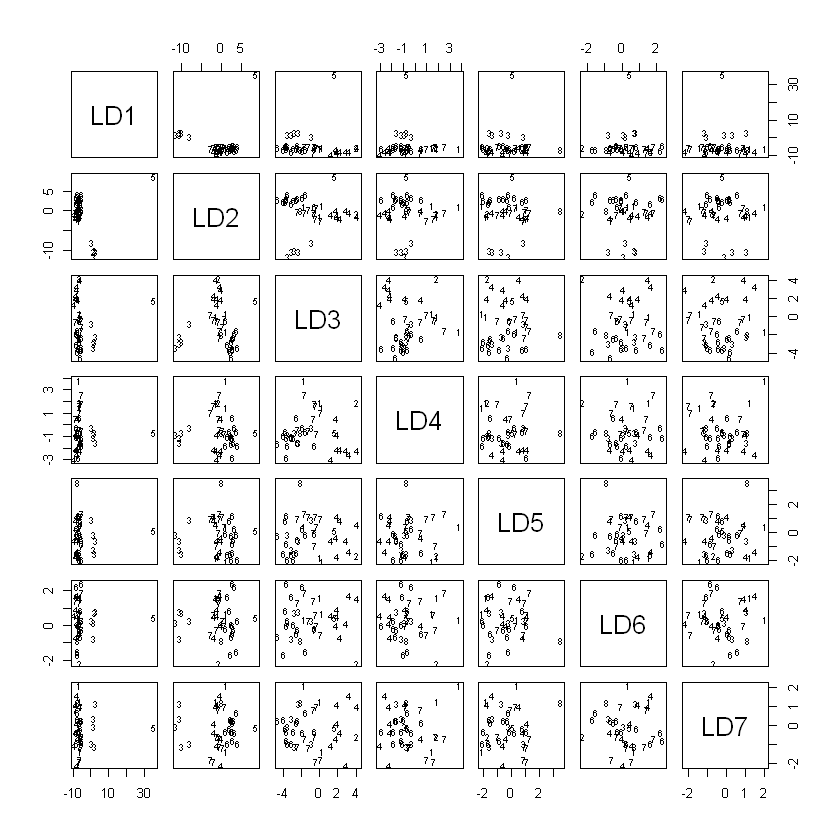

In [5]:
plot(model)

In [6]:
# Predicted classes
head(predictions$class, 6)
# Predicted probabilities of class memebership.
head(predictions$posterior, 6) 
# Linear discriminants
head(predictions$x, 3) 

[1] 1 1 1 2 3 3
Levels: 1 2 3 4 5 6 7 8

,1,2,3,4,5,6,7,8
2,8.901980e-01,1.102084e-05,8.313263e-44,4.570770e-05,0.000000e+00,1.385910e-03,1.083594e-01,1.737731e-11
3,9.639812e-01,6.214358e-08,2.208434e-33,1.882806e-05,0.000000e+00,6.078021e-08,3.599989e-02,5.953073e-11
7,9.950837e-01,3.128926e-12,7.461621e-47,1.774993e-11,0.000000e+00,1.139857e-05,4.903869e-03,9.933203e-07
18,1.223035e-07,9.999980e-01,4.259994e-45,1.899529e-06,0.000000e+00,2.084947e-16,2.595980e-08,5.128642e-18
19,2.974869e-47,1.153675e-52,1.000000e+00,1.861759e-49,3.750909e-312,7.538118e-56,6.340621e-40,6.331798e-51
25,5.458609e-26,1.981389e-28,1.000000e+00,6.462302e-27,0.000000e+00,3.266778e-34,1.212637e-18,1.390443e-28


,LD1,LD2,LD3,LD4,LD5,LD6,LD7
2,-1.561242,1.6966305,1.1649743,2.004066,-1.8812575,0.35150483,-1.192840
3,-1.633147,-0.9836617,0.8708281,2.426501,-1.5634833,1.25148980,1.440061
7,-2.025401,1.5929971,-0.8612134,4.311522,0.6432914,0.02624472,2.247828


In [7]:
predmodel.test.lda = predict(model, data=test.data)
table <- table(Predicted=predmodel.test.lda$class, Species=train.data$spec_as_int)
print(confusionMatrix(table))

Confusion Matrix and Statistics

         Species
Predicted  1  2  3  4  5  6  7  8
        1  3  0  0  0  0  0  0  0
        2  0  1  0  0  0  0  0  0
        3  0  0  5  0  0  0  0  0
        4  0  0  0  8  0  0  0  0
        5  0  0  0  0  1  0  0  0
        6  0  0  0  0  0 13  0  0
        7  0  0  0  0  0  0  8  0
        8  0  0  0  0  0  0  0  1

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9119, 1)
    No Information Rate : 0.325      
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity             1.000    1.000    1.000      1.0    1.000    1.000
Specificity             1.000    1.000    1.000      1.0    1.000    1.000
Pos Pred Value          1.000    1